# Creating Txy, Pxy, and xy diagrams for the binary water ethanol system with Modified UNIFAC (Dortmund)

In [8]:
from thermo import *
from thermo.unifac import DOUFSG, DOUFIP2016
# Load constants and properties
constants, properties = ChemicalConstantsPackage.from_IDs(['ethanol', 'water'])
# Objects are initialized at a particular condition
T = 300
P = 1e5
zs = [.5, .5]

# Use Peng-Robinson for the vapor phase
eos_kwargs = {'Pcs': constants.Pcs, 'Tcs': constants.Tcs, 'omegas': constants.omegas}
gas = CEOSGas(PRMIX, HeatCapacityGases=properties.HeatCapacityGases, eos_kwargs=eos_kwargs)

# Configure the activity model
GE = UNIFAC.from_subgroups(chemgroups=constants.UNIFAC_Dortmund_groups, version=1, T=T, xs=zs,
                           interaction_data=DOUFIP2016, subgroups=DOUFSG)
# Configure the liquid model with activity coefficients
liquid = GibbsExcessLiquid(
    VaporPressures=properties.VaporPressures,
    HeatCapacityGases=properties.HeatCapacityGases,
    VolumeLiquids=properties.VolumeLiquids,
    GibbsExcessModel=GE,
    equilibrium_basis='Psat', caloric_basis='Psat',
    T=T, P=P, zs=zs)

# Create a flasher instance, assuming only vapor-liquid behavior
flasher = FlashVL(constants, properties, liquid=liquid, gas=gas)

In [ ]:
# Create a T-xy plot at 1 bar
_ = flasher.plot_Txy(P=1e5, pts=100)

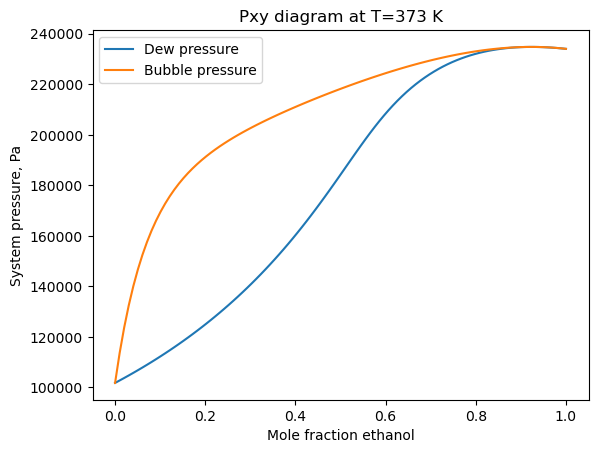

In [2]:
# Create a P-xy plot at 373 Kelvin
_ = flasher.plot_Pxy(T=373, pts=100)

In [ ]:
# Create a xy diagram at 373 Kelvin
_ = flasher.plot_xy(T=373, pts=100)

In [ ]:
# Create a xy diagram at 1 bar
_ = flasher.plot_xy(P=1e5, pts=100)